<a href="https://colab.research.google.com/github/tanik15/AppDevelopment/blob/main/ML_pracs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

In [ ]:
%pip install lime
%pip install shap
%pip install minisom

In [ ]:
# Imports
import numpy
import shap
from minisom import MiniSom
from keras.datasets import imdb, mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import keras
import cv2
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings ('ignore')
#fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# limiting the vocab to 5000 words
top_words= 5000
# Q - load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = top_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(X_train[1]) # This is the first training example: Word indices in form of numbers
print(type(X_train[1])) # List of numbers that represenets words from a vocab
print(len(X_train[1])) # Number of words
print(y_train[1])  # Sentiment of the review
print(type(y_train[1])) # Type of value

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [ ]:
max_review_length = 400 # Every review will be of this length
# Question - pad
X_train = pad_sequences(X_train, maxlen = max_review_length)
X_test = pad_sequences(X_test, maxlen = max_review_length)
print(X_train.shape)

(25000, 400)


In [ ]:
embedding_vector_length = 32 # every review will be represeneted in the form of 32 element vectors
model = Sequential()
model.add(Embedding(top_words + 1, embedding_vector_length, input_length = max_review_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy']) #Question

In [ ]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
scores # Firsst is loss and second is accuracy

[0.371402382850647, 0.8652799725532532]

In [ ]:
print("Accuracy: %.2f%%" % (scores[1]*100)) #Question

Accuracy: 86.53%


In [ ]:
import matplotlib.pyplot as plt
#Question
# PLOT epoch v/s accuracy
y1=hist.history['accuracy']  # the accuracy for each epoch
y2=hist.history['val_accuracy'] # the validation accuracy for each epoch
plt.plot(y1)
plt.plot(y2)

In [ ]:
import matplotlib.pyplot as plt
# Plot epoch vs Loss
#question
y1=hist.history['loss']
y2=hist.history['val_loss']
plt.plot(y1)
plt.plot(y2)

In [ ]:
pred=model.predict(X_test)
print(pred)

# CNN


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train= x_train.reshape(60000,28,28)  # 60000 images of size 28,28

x_test= x_test.reshape(x_test.shape[0],28,28)  # x_test.shape[0] is numebr of images.

input_shape=(28,28,1) # 1 is number of channels. eg RGB. this one is black and white


y_train=keras.utils.to_categorical(y_train,10)  # converts categories to one hot encoded vectors

y_test=keras.utils.to_categorical(y_test,10)

x_train= x_train.astype('float32')
x_test= x_test.astype('float32')

for i in range(10):
  plt.imshow(x_train[i])
  plt.subplot(5,2,i+1)

In [ ]:
x_train /= 255
x_test /=255
model = None
# Q
batch_size = 64 # told in question
num_classes = 10

def build_model(optimizer):
  model= Sequential()
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics = ['accuracy'])
  model.summary()
  return model

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for i in optimizers:

  model = build_model(i) # added this
  plot_model(model, to_file="mnist model"+ '.jpg', show_shapes=True)
  hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=1, verbose=1, validation_data=(x_test,y_test))
  y1=hist.history['accuracy']
  y2=hist.history['val_accuracy']
  plt.plot(y1)
  plt.plot(y2)



In [ ]:
keras.models.save_model(model, "mnist.h5", save_format="h5")
def predict_image(model,img):
  img = np.reshape(img,(1,28,28)) # 1 image of 28,28
  pred = model.predict(img)
  img = img.astype('float32')
  img = img / 255
  print(pred)
  answer = np.argmax(pred)
  print(answer)
m = load_model('/content/mnist.h5')
predict_image(m, x_test[7])
plt.imshow(x_test[7],cmap='gray')

# PCA

In [ ]:
iris = datasets.load_iris() # Loading data

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names

X: [5.1 3.5 1.4 0.2]


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)  # scaling values from 0-1

In [ ]:
def plot3clusters(X, title, vtitle):
    """
    So what we want to do here is we have differert data points on a piece of paper. we want to give colors to different tyeps of data points

    """

    plt.figure()
    # picking a color for a group
    colors = ['navy','turquoise','darkorange']
    # i =  unique identifier for the group
    for color, i, target_name in zip(colors, [0,1,2], target_names):

        # if any data point label = i, get its x and y cordinate and build its scatter plot
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1") # PC1
        plt.ylabel(vtitle + "2") # PC2
        plt.show()

In [ ]:
pca = PCA()
pca_transformed = pca.fit_transform(X_scaled)

# Displaying new Transformed Values
print("Pca transformed: ", pca_transformed[0])

# Calling the plotting function
plot3clusters(pca_transformed[:, :2], 'PCA', 'PC')



# Autoencoders

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)


X: [5.1 3.5 1.4 0.2]


In [ ]:
def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

In [ ]:
# this is the size of our encoded representations
input_dim = X_scaled.shape[1] # Total number of features (4)
encoding_dim = 2  # the dimension will be reduced to 2

# this is our input placeholder
input_img = Input(shape=(4,))
# <KerasTensor: shape=(None, 4) dtype=float32 (created by layer 'input_2')>

# "encoded" representation of the input
encoded = Dense(encoding_dim,activation='sigmoid')(input_img) # input img will be compressed to 2 dims

# "decoded" lossy reconstruction of the input
decoded = Dense(input_dim,activation='sigmoid')(encoded)

# Map an input to reconstruction
autoencoder = Model(input_img,decoded)  # specified input = img, decoded= output
autoencoder.compile(optimizer='adam',loss='mse')
print(autoencoder.summary())
history = autoencoder.fit(X_scaled,X_scaled,epochs=2000,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)
# X = Y since the goal is re-construction and 10% data for validation


# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

# Use the encoded layer to encode the training input
encoder = Model(input_img,encoded)  # Encoder model that takes input image and shrinks it
encoded_input = Input(shape=(encoding_dim,))  # this is a way to give encoded input to decoder (we already know what dimensions we are shrinking down to)
decoder_layer = autoencoder.layers[-1]  # last layer of the autoencoder is the decoder layer that gives reconstructed output
decoder = Model(encoded_input,decoder_layer(encoded_input)) # input is encoded data and output is decoder layer (resconstructor)
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2],'Non-Linear sigmoid-based AE','AE')

# XAI
## LIME

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())


In [ ]:
# Information about dataset
df.info()

In [ ]:
# Setting up the data for modelling

y=df['target'].to_frame() # define Y (Given)
X=df[df.columns.difference(['target'])] # define X  (Given)

# Question - do train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [ ]:
# Question - Build XBGoost classifier
model = XGBClassifier(random_state=42)
# Train with training data
model.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Making prediction with test data
y_pred = model.predict(X_test) # Given
# Performance Measurement
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))  # Given


Accuracy: 95.61%


In [ ]:
predictor_function = lambda x: model.predict_proba(x)

In [ ]:
# Make a lime explainer code here:
# This is a question

explainer = lime.lime_tabular.LimeTabularExplainer(X_test.to_numpy(),
                                                   feature_names=data.feature_names,
                                                   class_names = ['Positive', "Negative"],
    mode = 'classification'
)

In [ ]:
# Explain a single data point say at 5th index of out data.

data_point = 5
explanation = explainer.explain_instance(df.loc[data_point, data.feature_names].astype(int).values,predictor_function, num_features=5)
explanation.show_in_notebook(show_table=True)

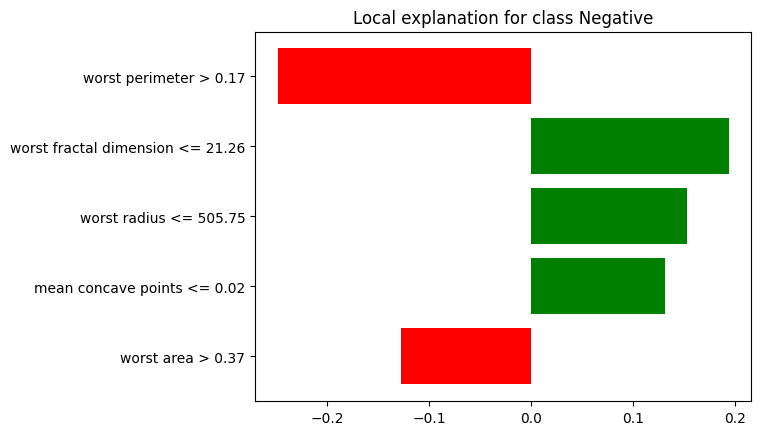

In [ ]:
figure = explanation.as_pyplot_figure()

## SHAP

In [ ]:
# Loading the data to work with
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()
df.info()
# Setting up the data for modelling
y=df['target'].to_frame() # define Y
X=df[df.columns.difference(['target'])] # define X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # create train and test

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = XGBClassifier(random_state=42,gpu_id=0) # build classifier Gradient Boosted decision trees
model.fit(X_train,y_train.values.ravel())
# Given

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [ ]:
# ques
explainer = shap.TreeExplainer(model)

# ques
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value


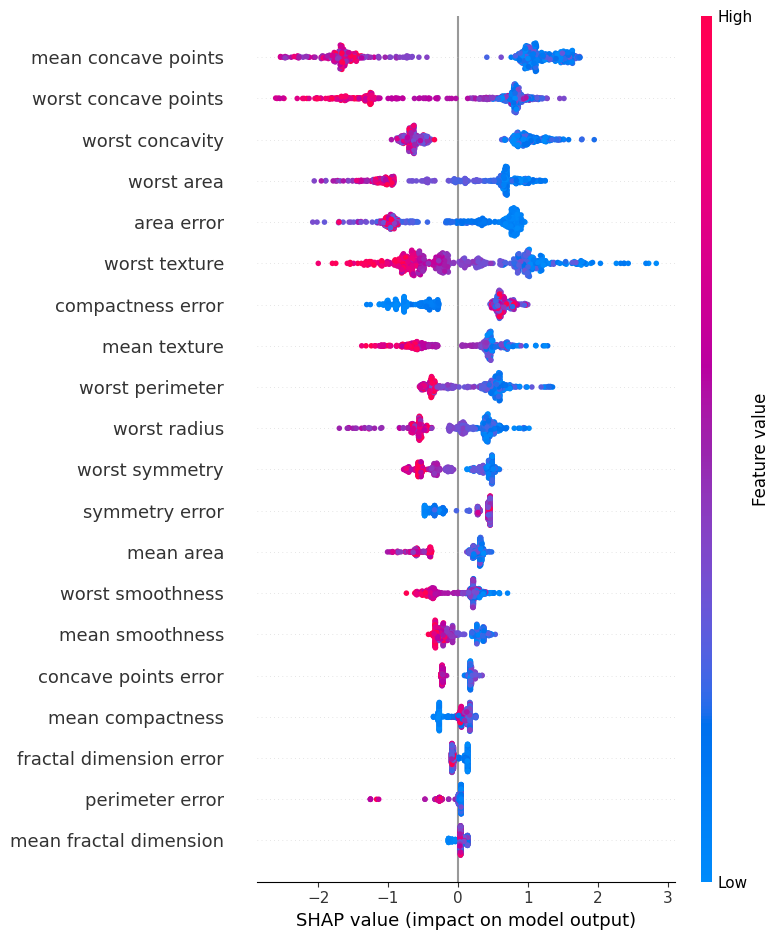

In [ ]:
shap.summary_plot(shap_values, X)

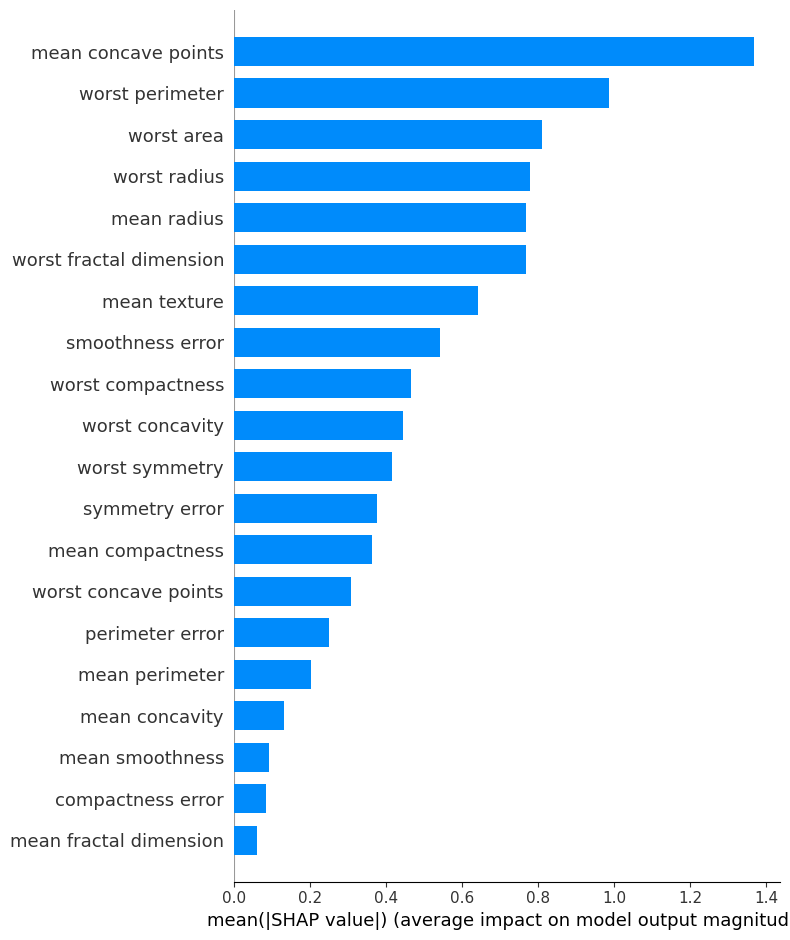

In [ ]:
shap.summary_plot(shap_values, X,plot_type="bar", feature_names=data.feature_names)

# SOM

In [ ]:
data = pd.read_csv('Credit_Card_Applications.csv')

In [ ]:
data.head()


,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
# Ques shape of data
data.shape

(690, 16)

In [ ]:
# Ques: Info of data
data.info()

In [ ]:
# Defining X variables for the input of SOM  (GIVEN)
X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

# QUES- convert X variable into pd.dataframe
pd.DataFrame(X)

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))  # GIVEN
# Ques: Apply fit_transform
X = sc.fit_transform(X)

pd.DataFrame(X) #GIVEN


In [ ]:
# Set the hyper parameters  (GIVEN)
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

# QUES : SOM MODEL
som = MiniSom(x = som_grid_rows,y =  som_grid_columns,input_len = 13, sigma=1, learning_rate=0.5)

In [ ]:
# Initializing the weights
som.random_weights_init(X)

# QUES: train som
som.train_random(X,iterations)

# giveNM
# Returns the distance map from the weights:
som.distance_map()

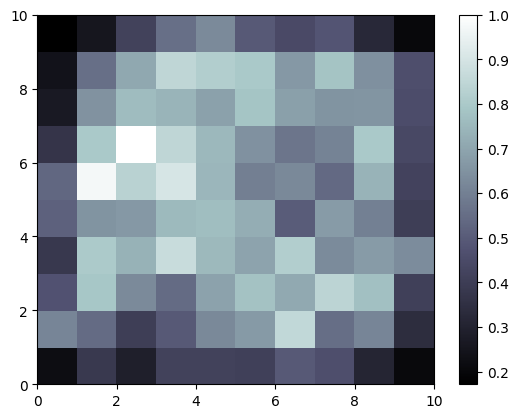

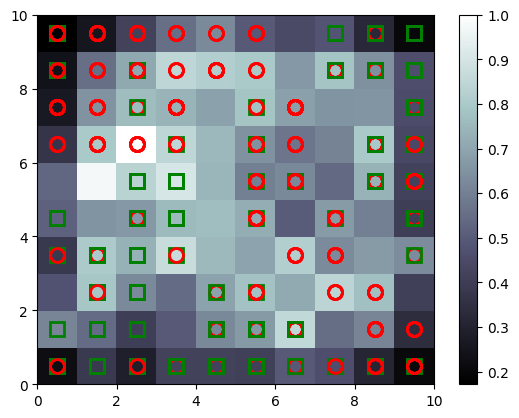

In [ ]:
from pylab import plot, axis, show, pcolor, colorbar, bone

bone()
pcolor(som.distance_map().T)       # Distance map as background
colorbar()
show()
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()
# GIVENN

In [ ]:
mappings = som.win_map(X) # QUES

# GIVEN
mappings.keys()

# QUES find len of mappings
len(mappings.keys())


76

In [ ]:
mappings[(9,8)]
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)
frauds
# GIVEN

In [ ]:
# QUES: Convert fraud customers back
frauds1 = sc.inverse_transform(frauds)
pd.DataFrame(frauds1) # GIVEN

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,37.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
1,1.0,23.17,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
2,1.0,34.58,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
3,1.0,33.67,2.165,2.0,8.0,4.0,1.500,0.0,0.0,0.0,0.0,3.0,120.0
4,1.0,20.42,0.000,2.0,8.0,4.0,0.000,0.0,0.0,0.0,0.0,3.0,184.0
5,1.0,29.58,4.500,2.0,9.0,4.0,7.500,1.0,1.0,2.0,1.0,2.0,330.0
6,1.0,23.08,2.500,2.0,8.0,4.0,1.085,1.0,1.0,11.0,1.0,2.0,60.0
7,1.0,39.58,13.915,2.0,9.0,4.0,8.625,1.0,1.0,6.0,1.0,2.0,70.0
8,1.0,63.33,0.540,2.0,8.0,4.0,0.585,1.0,1.0,3.0,1.0,2.0,180.0
9,1.0,27.83,1.500,2.0,9.0,4.0,2.000,1.0,1.0,11.0,1.0,2.0,434.0
